In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
train_data=pd.read_csv("./Train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


categoricals :
+ Item_Identifier 
+ Item_Fat_Content
+ Item_Type 
+ Outlet_Identifier
+ Outlet_Size 
+ Outlet_Location_Type 
+ Outlet_Type     

In [4]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train_data["Item_Weight"].fillna(train_data["Item_Weight"].mean(),inplace=True)


In [6]:
mode_outlet_size=train_data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [7]:
mis_vals=train_data["Outlet_Size"].isnull()

In [8]:
train_data.loc[mis_vals,"Outlet_Size"]=train_data.loc[mis_vals,"Outlet_Type"].apply(lambda x: mode_outlet_size[x])

In [9]:
train_data["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [10]:
train_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


D:\Temp\ipykernel_16900\2329484625.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Item_Weight"])


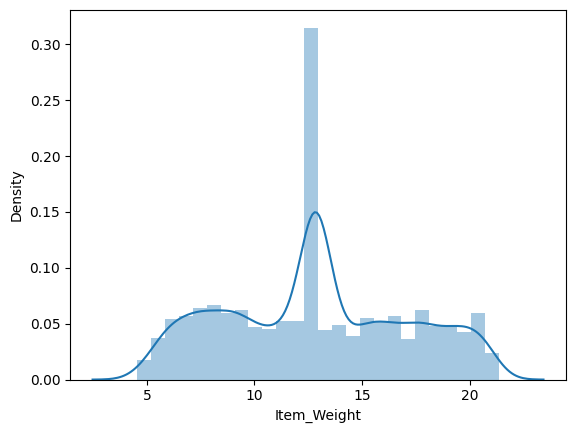

In [12]:
sns.distplot(train_data["Item_Weight"])
plt.show()

D:\Temp\ipykernel_16900\1303340629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Item_Visibility"])


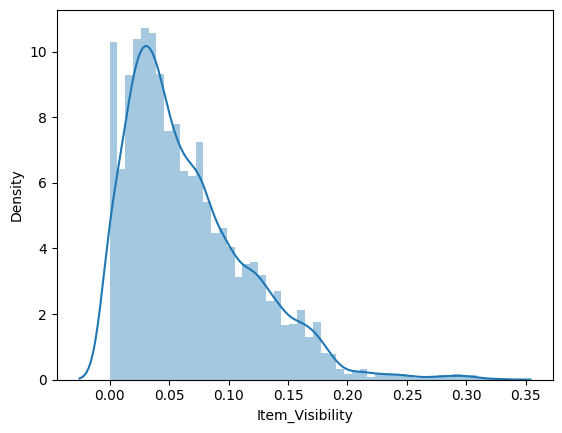

In [13]:
sns.distplot(train_data["Item_Visibility"])
plt.show()

D:\Temp\ipykernel_16900\870769456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Item_MRP"])


<AxesSubplot: xlabel='Item_MRP', ylabel='Density'>

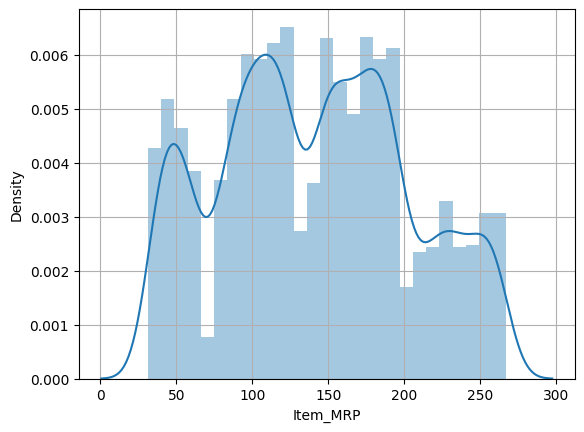

In [14]:
plt.grid()
sns.distplot(train_data["Item_MRP"])

D:\Temp\ipykernel_16900\189424083.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Item_Weight"])


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

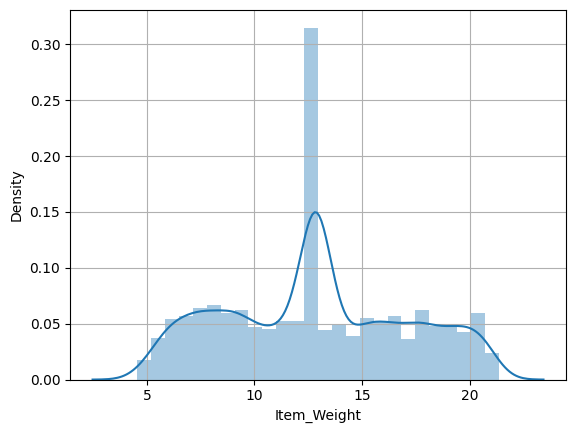

In [15]:
plt.grid()
sns.distplot(train_data["Item_Weight"])

D:\Temp\ipykernel_16900\1276837773.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data["Item_Outlet_Sales"])


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

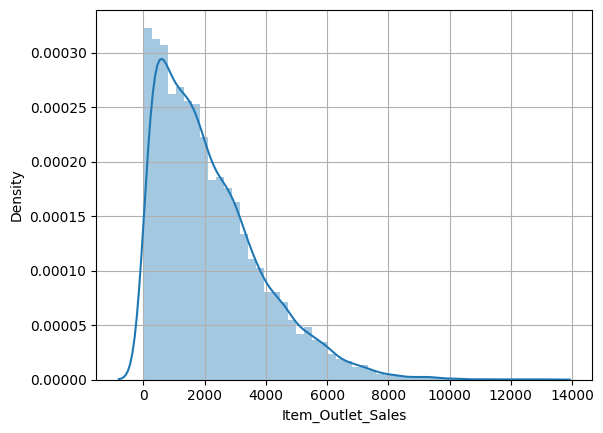

In [16]:
plt.grid()
sns.distplot(train_data["Item_Outlet_Sales"])

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

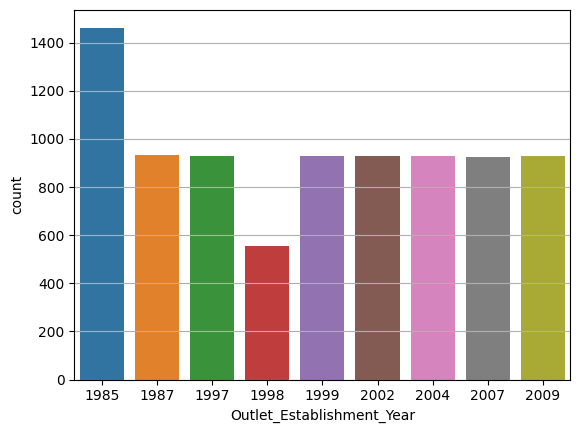

In [17]:
plt.grid()
sns.countplot(x="Outlet_Establishment_Year",data=train_data)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

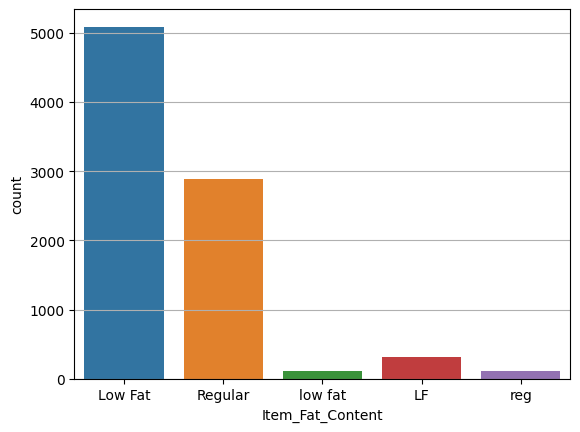

In [18]:
plt.grid()
sns.countplot(x="Item_Fat_Content",data=train_data)

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

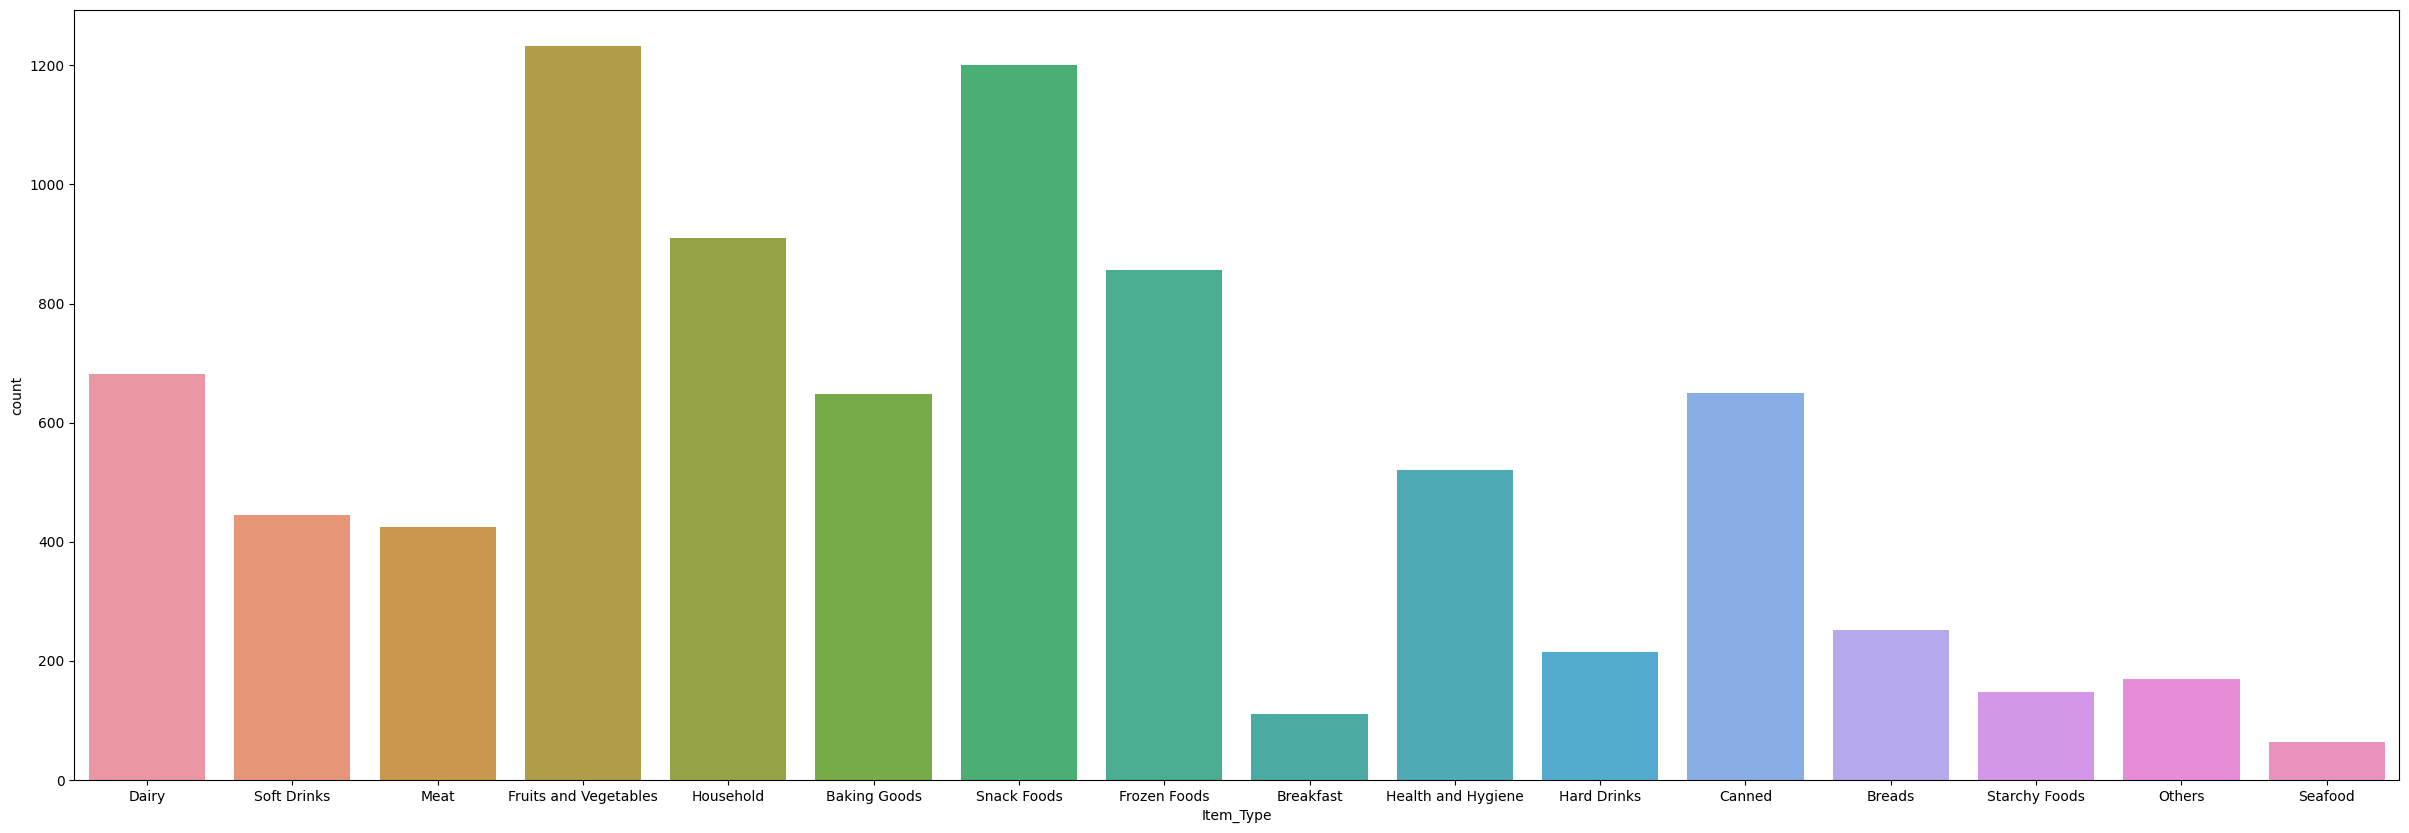

In [19]:

plt.figure(figsize=(30,10))
sns.countplot(x="Item_Type",data=train_data)

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

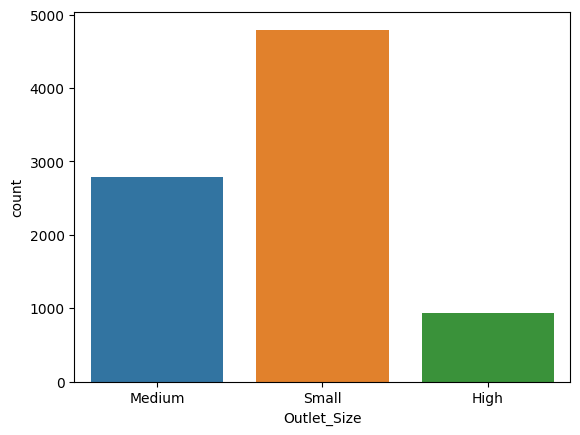

In [20]:

# plt.figure(figsize=(30,10))
sns.countplot(x="Outlet_Size",data=train_data)

In [21]:
train_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
train_data.replace({"Item_Fat_Content":{"low fat":"Low Fat",
                                        "LF":"Low Fat",
                                        "reg":"Regular"}},inplace=True)


In [23]:
train_data["Item_Fat_Content"].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
from catboost import CatBoostRegressor
X=train_data.drop("Item_Outlet_Sales",axis=1)
y=train_data["Item_Outlet_Sales"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)
cat=CatBoostRegressor(learning_rate=0.1,max_depth=7)
cat.fit(x_train,y_train,cat_features=[0,2,4,6,8,9,10],plot=True,verbose=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1600.0287296	total: 79.9ms	remaining: 1m 19s
10:	learn: 1162.6067367	total: 653ms	remaining: 58.7s
20:	learn: 1072.0718737	total: 1.02s	remaining: 47.7s
30:	learn: 1049.8947829	total: 1.41s	remaining: 44s
40:	learn: 1042.5369737	total: 1.76s	remaining: 41.1s
50:	learn: 1037.1904810	total: 2.15s	remaining: 40s
60:	learn: 1029.9081679	total: 2.55s	remaining: 39.3s
70:	learn: 1025.5189650	total: 2.92s	remaining: 38.2s
80:	learn: 1022.0311989	total: 3.33s	remaining: 37.8s
90:	learn: 1018.4024169	total: 3.77s	remaining: 37.6s
100:	learn: 1012.8791671	total: 4.2s	remaining: 37.4s
110:	learn: 1008.8042151	total: 4.58s	remaining: 36.7s
120:	learn: 1004.2087876	total: 4.97s	remaining: 36.1s
130:	learn: 999.4154488	total: 5.34s	remaining: 35.4s
140:	learn: 993.8875834	total: 5.74s	remaining: 35s
150:	learn: 989.9604374	total: 6.13s	remaining: 34.5s
160:	learn: 985.5535911	total: 6.52s	remaining: 34s
170:	learn: 980.9215610	total: 6.9s	remaining: 33.5s
180:	learn: 975.9710440	total: 7.3

In [31]:
ypred=cat.predict(x_test)
metrics.r2_score(y_test,ypred)

0.5428400599364073

categoricals :
+ Item_Identifier 
+ Item_Fat_Content
+ Item_Type 
+ Outlet_Identifier
+ Outlet_Size 
+ Outlet_Location_Type 
+ Outlet_Type     

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encode=LabelEncoder()
train_data["Item_Identifier"]=encode.fit_transform(train_data["Item_Identifier"])

step1=ColumnTransformer([("",OneHotEncoder(),[2,4,6,8,9,10])],remainder="passthrough")

In [28]:
X=train_data.drop("Item_Outlet_Sales",axis=1)
y=train_data["Item_Outlet_Sales"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score

# step1=ColumnTransformer([("",OneHotEncoder(),[1,4,5])],remainder="passthrough")
lr=LinearRegression()
svr=LinearSVR()
gbr=GradientBoostingRegressor()

step2=StackingRegressor([("model",)])
pipe=Pipeline([("step1",step1),("step2",step2)])
pipe.fit(x_train,y_train)
ypred=pipe.predict(x_test)
r2_score(y_test,ypred)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# encode=LabelEncoder()
# train_data["Item_Identifier"]=encode.fit_transform(train_data["Item_Identifier"])
# train_data["Item_Fat_Content"]=encode.fit_transform(train_data["Item_Fat_Content"])
# train_data["Item_Type"]=encode.fit_transform(train_data["Item_Type"])
# train_data["Outlet_Identifier"]=encode.fit_transform(train_data["Outlet_Identifier"])
# train_data["Outlet_Size"]=encode.fit_transform(train_data["Outlet_Size"])
# train_data["Outlet_Location_Type"]=encode.fit_transform(train_data["Outlet_Location_Type"])
# train_data["Outlet_Type"]=encode.fit_transform(train_data["Outlet_Type"])

In [ ]:
# xgb=XGBRegressor()
# xgb.fit(x_train,y_train)


In [ ]:
# ypred=xgb.predict(x_test)


In [ ]:
# metrics.r2_score(y_test,ypred)


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# svr=GradientBoostingRegressor(alpha=0.07,n_estimators=300,max_depth=2)
# svr.fit(x_train,y_train)
# ypred=svr.predict(x_test)
# metrics.r2_score(y_true=y_test,y_pred=ypred)